## STATISTICS WORKSHOP  
  
__Version: March 2022__  

__USING THE NOTEBOOK__  
The present notebook is composed of text and code cells. The former include the instructions for the activity and look just like regular text in a webpage. Cells that have "Answer:" at the beginning of them are also text cells. To write your answer just double click on them so the cursor appears and you can type your answer. When you are done click "shift" + "enter".  
The code cells look like gray squares with empty square brackets to their left ([ ]). To run the code inside a code cell you'll need to hover on the top left corner of the box, and when the empty square brackets change to a "play" sign just click on it (alternatively: click on the code cell and then click "shift" + "enter"), this will make the outcome of the code to appear underneath the cell.  
  
The following code cell will upload all the libraries and functions we'll need for the workshop. Please run it.

In [1]:
# importing functions and libraries from a python file in a GitHub repo
import os
if not os.path.exists('stats-notebooks'):
    !git clone https://github.com/gapatino/stats-notebooks.git
%run stats-notebooks/statfuncs.py

# set formatting
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision=3, suppress=True)

Cloning into 'stats-notebooks'...
remote: Enumerating objects: 51, done.
remote: Total 51 (delta 0), reused 0 (delta 0), pack-reused 51
Unpacking objects: 100% (51/51), done.


__LOADING THE DATABASE__  
In this exercise we will use a database of patients evaluated for obstructive sleep apnea syndrome (OSAS). Each patient filled out a survey where epidemiological characteristics and symptoms were recorded. The database will contain some of those characteristics along with whether they had OSAS or not, and its severity, based on a measure of how frequently the patient stops breathing through the night called the Apnea-Hypopnea Index (ahi).  
  
We will upload the data we'll work with into memory from a CSV file in the website GitHub and put it in a variable called "data". Please execute the following code cells.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/gapatino/stats-notebooks/master/stats_workshop_database.csv")

Then define some of the columns in the database as categorical variables

In [3]:
data['gender']=data['gender'].astype('category')
data['osas_severity']=data['osas_severity'].astype('category')

Let's look at the data by displaying the first 10 rows of it

In [4]:
data.head(10)

,age,gender,bmi,snoring,apnea,alcohol,smoking,hypertension,osas,osas_severity,ahi
0,56,M,21.671,True,False,True,False,True,False,No,0.200
1,44,F,25.391,True,False,False,False,False,False,No,0.200
2,36,F,18.079,False,False,False,False,False,False,No,0.400
3,20,M,19.409,True,False,True,True,False,False,No,0.600
4,37,F,20.449,True,False,False,False,False,False,No,0.600
5,45,F,39.257,True,True,True,False,True,False,No,0.600
6,28,M,22.204,True,False,True,False,False,False,No,1.100
7,24,F,30.837,True,True,False,True,False,False,No,1.100
8,33,M,22.097,True,False,True,False,False,False,No,1.300
9,38,F,30.483,True,False,False,False,False,False,No,1.500


__APPLICATION EXERCISE__  
Below you will find questions about analyzing this data. After each question you will find a code cell and a text cell. Please enter the code for the appropriate statistical test in the code cell below it and run it, based on the output of the test answer the question in the text cell.  
If you need additional code cells you can add them by clicking on the button with the plus sign at the top of the page.

__Question 1__  
What is the type of each variable (column) in the dataset table?  
Hint: You don't need to run any functions to answer this

ANSWER: 

__Question 2__  
What is the mean and standard deviation of the age of male subjects?

In [5]:
parammct(data=data, independent='gender', dependent='age')

,M,F
Mean,50.593,57.173
SD,13.581,11.106
n,216.000,104.000
SEM,0.924,1.089
Lower bound CI,48.781,55.039
Upper bound CI,52.404,59.308


ANSWER:

__Question 3__  
Does the BMI values have a normal distribution across OSAS patients and controls?

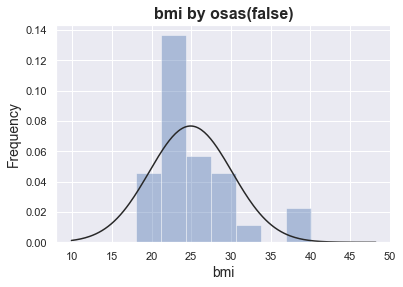

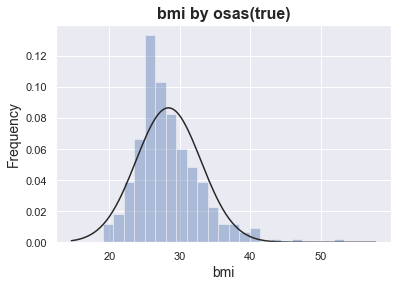

In [6]:
histograms(data=data, independent='osas', dependent='bmi')

ANSWER:

__Question 4__  
What is the median and interquartile range of BMI among smokers?

In [7]:
non_parammct(data=data, independent='smoking', dependent='bmi')

,False,True
Median,27.344,27.774
Minimum,18.079,19.409
Lower bound IQR,25.149,24.989
Upper bound IQR,30.071,31.569
Maximum,53.333,44.104
n,277.000,43.000


ANSWER:

__Question 5__  
What is the range of AHI among subjects that snore?

In [8]:
non_parammct(data=data, independent='snoring', dependent='ahi')

,True,False
Median,31.000,24.000
Minimum,0.200,0.400
Lower bound IQR,15.950,9.300
Upper bound IQR,51.000,40.500
Maximum,139.000,62.500
n,311.000,9.000


ANSWER:

__Question 6__  
How many levels of OSAS severity are there and how many subjects are in each of them?

In [9]:
non_parammct(data=data, independent='osas_severity', dependent='bmi')

,No,Mild,Moderate,Severe
Median,22.998,25.989,26.448,28.389
Minimum,18.079,20.338,19.841,19.068
Lower bound IQR,21.617,24.223,25.134,26.124
Upper bound IQR,26.979,27.877,31.185,30.656
Maximum,40.057,47.061,53.333,41.038
n,28.000,48.000,78.000,166.000


ANSWER:

__Question 7__  
Is there a difference in the mean age of subjects with and without OSAS?

In [10]:
t_test(data=data, independent='osas', dependent='age')

,Value
Difference between means,10.938E+00
SE difference,2.538E+00
t-test,-4.310E+00
p-value,21.841E-06
Lower bound difference CI,-5.329E-15
Upper bound difference CI,21.877E+00
Cohen's d,852.575E-03


ANSWER:

__Question 8__  
Is there a difference in the mean BMI of subjects across the severity levels of OSAS?

In [11]:
anova(data=data, independent='osas_severity', dependent='bmi')

,sum_sq,df,F,p,Eta squared
osas_severity,367.239E+00,3.000E+00,5.607E+00,932.704E-06,50.539E-03
Residual,6.899E+03,316.000E+00,,,


group1,group2,meandiff,p-adj,lower,upper,reject
Mild,Moderate,0.9643,0.6542,-1.2497,3.1783,False
Mild,No,-2.4809,0.1168,-5.3508,0.3889,False
Mild,Severe,1.2761,0.3436,-0.7018,3.2539,False
Moderate,No,-3.4452,0.005,-6.104,-0.7865,True
Moderate,Severe,0.3118,0.9,-1.345,1.9685,False
No,Severe,3.757,0.001,1.2914,6.2226,True


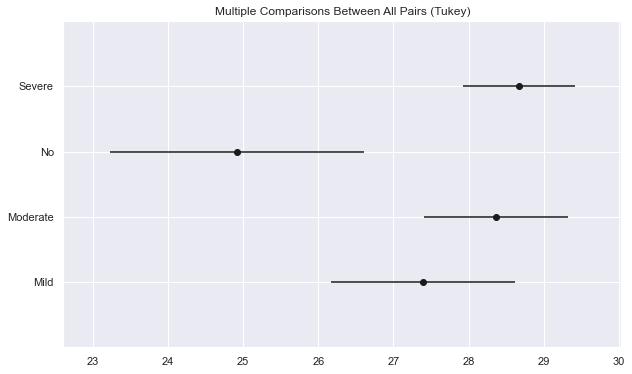

In [12]:
tukey(data=data, independent='osas_severity', dependent='bmi')

ANSWER:

__Question 9__  
Is there a difference in the number of subjects with apnea between those with and without OSAS?

In [13]:
chi_square(data=data, variable1='osas', variable2='apnea')

**Contingency Table**

apnea,False,True
osas,,
False,18,10
True,88,204


**Results Chi-square test**

,Value
Chi-square value,13.450E+00
p-value,245.014E-06
Degrees of freedom,1
Expected frequencies,"[[9.275, 18.725], [96.725, 195.275]]"


ANSWER:

__Question 10__  
Can the age predict if a subject will have OSAS?

Optimization terminated successfully.
         Current function value: 0.268658
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   osas   No. Observations:                  320
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            1
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                 0.09456
Time:                        14:17:40   Log-Likelihood:                -85.971
converged:                       True   LL-Null:                       -94.949
Covariance Type:            nonrobust   LLR p-value:                 2.260e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age              0.0663      0.017      4.009      0.000       0.034       0.099
interceptant    -0.8515      0.757     -1.125      0.261      -2.335       0.632
================================================================================
"""

**Coefficients confidence intervals**

,0,1
age,33.906E-03,98.770E-03
interceptant,-2.335E+00,632.384E-03


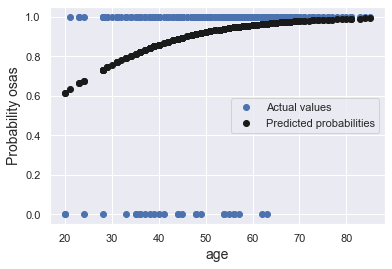

In [14]:
logistic_reg(data=data, independent='age', dependent='osas')

ANSWER:

__Question 11__  
Did you find this session useful?

ANSWER: 

__Question 12__  
Would you prefer to have future statistics sessions delivered as regular lectures or hands-on exercises like this one?

ANSWER: 